In [46]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para utilizar la regresión lineal
from sklearn.linear_model import LogisticRegression
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib as mplt
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree


# Perfilamiento de datos.
La primera parte de este notebook buscará hacer un perfilamiento de datos para tener una comprensión a más fondo de los mismos.

In [3]:
# Ubicacion de la base de datos
db_location = "SaludAlpes_diagnosticos_dataset.csv"
# Leer los datos
df_health = pd.read_csv(db_location, delimiter=";")

In [4]:
# Miramos el número de columnas y filas
df_health.shape

(768, 11)

In [5]:
# Miramos el número de columnas y filas
df_health.head()

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1


In [6]:
# Miramos los tipos. 
df_health.dtypes

Hair color                  object
Pregnancies                 object
Glucose                     object
City                        object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                          int64
DiabetesPedigreeFunction    object
Age                          int64
Outcome                     object
dtype: object

# Preprocesamiento general

In [7]:
# Miramos los valores nulos de la columna de embarazos
pd.value_counts(df_health['Pregnancies'])

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      37
9      28
10     24
11     11
13     10
12      9
14      2
15      1
-       1
17      1
Name: Pregnancies, dtype: int64

Encontramos un valor que es nulo, con el simbolo "-", por lo que lo cambiaremos a un 0

In [8]:
df_health["Pregnancies"] = [s.replace("-", "0") for s in df_health["Pregnancies"]]

In [9]:
df_health['Pregnancies'] = df_health['Pregnancies'].astype(int)

In [10]:
# Y hacer una descripción de los datos
df_health.describe()

,Pregnancies,BMI,Age
count,768.000000,768.000000,768.000000
mean,3.834635,289.796875,38.011719
std,3.369082,116.757554,117.825600
min,0.000000,0.000000,21.000000
25%,1.000000,251.750000,24.000000
50%,3.000000,309.000000,29.000000
75%,6.000000,359.000000,41.000000
max,17.000000,671.000000,3256.000000


In [11]:
df_health['Glucose'].value_counts()

99     17
100    16
106    14
111    14
125    14
       ..
177     1
198     1
44      1
169     1
65      1
Name: Glucose, Length: 137, dtype: int64

In [12]:
#Utilizamos un dataframe temporal para modificar y describir la información de Glucose
df_testing= df_health
df_testing = df_testing[df_testing['Glucose']!='-']
df_testing = df_testing[df_testing['Glucose']!='0']
df_testing['Glucose'] = df_testing['Glucose'].astype(int)

df_testing.describe()

,Pregnancies,Glucose,BMI,Age
count,762.000000,762.000000,762.000000,762.000000
mean,3.846457,121.715223,290.736220,38.068241
std,3.373592,30.545569,116.071368,118.284566
min,0.000000,44.000000,0.000000,21.000000
25%,1.000000,99.000000,252.000000,24.000000
50%,3.000000,117.000000,310.000000,29.000000
75%,6.000000,141.000000,359.000000,41.000000
max,17.000000,199.000000,671.000000,3256.000000


In [13]:
#Ahora que conocemos la media de Glucose, reemplazamos el dato "-" y los 0s con el entero más cercano a esta media
df_health["Glucose"] = [s.replace("-", "122") for s in df_health["Glucose"]]
def change_zeros_Glucose (row):
    if row['Glucose'] == '0' :
        return 122
    if row['Glucose'] == 0 :
        return 122
    return row['Glucose']
df_health['Glucose']= df_health.apply(lambda row:change_zeros_Glucose(row),axis=1)
df_health['Glucose'] = df_health['Glucose'].astype(int)
df_health.describe()


,Pregnancies,Glucose,BMI,Age
count,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.717448,289.796875,38.011719
std,3.369082,30.425871,116.757554,117.825600
min,0.000000,44.000000,0.000000,21.000000
25%,1.000000,99.750000,251.750000,24.000000
50%,3.000000,117.000000,309.000000,29.000000
75%,6.000000,140.250000,359.000000,41.000000
max,17.000000,199.000000,671.000000,3256.000000


In [14]:
df_health['BloodPressure'].value_counts()

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     38
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
96      4
44      4
106     3
100     3
110     3
98      3
30      2
55      2
46      2
104     2
108     2
-       1
24      1
122     1
102     1
40      1
38      1
61      1
95      1
114     1
Name: BloodPressure, dtype: int64

In [15]:
#Utilizamos un dataframe temporal para modificar y describir la información de BloodPressure
df_testing= df_health
df_testing = df_testing[df_testing['BloodPressure']!='-']
df_testing = df_testing[df_testing['BloodPressure']!='0']
df_testing['BloodPressure'] = df_testing['BloodPressure'].astype(int)

df_testing.describe()

,Pregnancies,Glucose,BloodPressure,BMI,Age
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,3.849727,121.904372,72.400273,292.987705,38.355191
std,3.356899,30.584442,12.389910,112.854839,120.662318
min,0.000000,44.000000,24.000000,0.000000,21.000000
25%,1.000000,100.000000,64.000000,254.000000,24.000000
50%,3.000000,117.000000,72.000000,312.000000,29.000000
75%,6.000000,141.000000,80.000000,359.000000,41.000000
max,17.000000,199.000000,122.000000,671.000000,3256.000000


In [16]:
#Ahora que conocemos la media de BloodPressure, reemplazamos el dato "-" y los 0s con el entero más cercano a esta media
df_health["BloodPressure"] = [s.replace("-", "72") for s in df_health["BloodPressure"]]
def change_zeros_BloodPressure (row):
    if row['BloodPressure'] == '0' :
        return 72
    if row['BloodPressure'] == 0 :
        return 72
    return row['BloodPressure']
df_health['BloodPressure']= df_health.apply(lambda row:change_zeros_BloodPressure(row),axis=1)
df_health['BloodPressure'] = df_health['BloodPressure'].astype(int)


In [17]:
# Miramos el número de columnas y filas
df_health['SkinThickness'].value_counts()

0     226
32     31
30     27
27     23
23     22
     ... 
56      1
-       1
63      1
99      1
60      1
Name: SkinThickness, Length: 52, dtype: int64

In [18]:
#Utilizamos un dataframe temporal para modificar y describir la información de SkinThicknes
df_testing= df_health
df_testing = df_testing[df_testing['SkinThickness']!='-']
df_testing['SkinThickness'] = df_testing['SkinThickness'].astype(int)

df_testing.describe()

<ipython-input-18-a0e9ef1cce76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['SkinThickness'] = df_testing['SkinThickness'].astype(int)


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.839635,121.717080,72.382008,20.563233,289.670143,38.006519
std,3.368429,30.445723,12.103830,15.945349,116.780873,117.902397
min,0.000000,44.000000,24.000000,0.000000,0.000000,21.000000
25%,1.000000,99.500000,64.000000,0.000000,251.500000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,309.000000,29.000000
75%,6.000000,140.500000,80.000000,32.000000,359.000000,41.000000
max,17.000000,199.000000,122.000000,99.000000,671.000000,3256.000000


In [19]:
#Ahora que conocemos la media de SkinThickness, reemplazamos el dato "-" con el entero más cercano a esta media
df_health["SkinThickness"] = [s.replace("-", "21") for s in df_health["SkinThickness"]]
df_health['SkinThickness'] = df_health['SkinThickness'].astype(int)
df_health.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.717448,72.381510,20.563802,289.796875,38.011719
std,3.369082,30.425871,12.095945,15.934959,116.757554,117.825600
min,0.000000,44.000000,24.000000,0.000000,0.000000,21.000000
25%,1.000000,99.750000,64.000000,0.000000,251.750000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,309.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,359.000000,41.000000
max,17.000000,199.000000,122.000000,99.000000,671.000000,3256.000000


In [20]:
# Miramos el número de columnas y filas
df_health['Insulin'].value_counts()

0      373
105     11
140      9
130      9
120      8
      ... 
128      1
304      1
15       1
387      1
43       1
Name: Insulin, Length: 187, dtype: int64

In [21]:
#Utilizamos un dataframe temporal para modificar y describir la información de Insulin
df_testing= df_health
df_testing = df_testing[df_testing['Insulin']!='-']
df_testing['Insulin'] = df_testing['Insulin'].astype(int)

df_testing.describe()

<ipython-input-21-dd28556889da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['Insulin'] = df_testing['Insulin'].astype(int)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.839635,121.717080,72.382008,20.563233,79.903520,289.670143,38.006519
std,3.368429,30.445723,12.103830,15.945349,115.283105,116.780873,117.902397
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,251.500000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,29.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,359.000000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,3256.000000


In [22]:
#Ahora que conocemos la media de Insulin, reemplazamos el dato "-" con el entero más cercano a esta media
df_health["Insulin"] = [s.replace("-", "80") for s in df_health["Insulin"]]
df_health['Insulin'] = df_health['Insulin'].astype(int)
df_health.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.717448,72.381510,20.563802,79.903646,289.796875,38.011719
std,3.369082,30.425871,12.095945,15.934959,115.207929,116.757554,117.825600
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,251.750000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,309.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,359.000000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,3256.000000


In [23]:
# Buscamos datos irregulares
df_health[df_health['Age']>100]

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
196,Black,1,105,New York,58,0,0,243,187,450,0
208,Black,1,96,New York,64,27,87,332,289,3256,0


In [24]:
#Dado que no hay registro de que existan personas que tengan las edades mostradas en estás filas, se modificarán

df_testing=df_health[df_health['Age']<200]
df_testing.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.842037,121.772846,72.411227,20.582245,79.998695,289.802872,33.272846
std,3.370360,30.445375,12.096749,15.936734,115.321925,116.887876,11.758906
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,252.000000,24.000000
50%,3.000000,117.500000,72.000000,23.000000,34.000000,309.000000,29.000000
75%,6.000000,140.750000,80.000000,32.000000,127.750000,359.000000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,81.000000


In [25]:
df_health['Age'].replace({450:33,3256:33},inplace = True)
df_health.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.717448,72.381510,20.563802,79.903646,289.796875,33.272135
std,3.369082,30.425871,12.095945,15.934959,115.207929,116.757554,11.743573
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,251.750000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,309.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,359.000000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,81.000000


In [26]:
# Miramos el número de columnas y filas
df_health['DiabetesPedigreeFunction'].value_counts()

258    6
254    6
207    5
238    5
259    5
      ..
545    1
532    1
645    1
661    1
947    1
Name: DiabetesPedigreeFunction, Length: 514, dtype: int64

In [27]:
#Utilizamos un dataframe temporal para modificar y describir la información de DiabetesPedigreeFunction
df_testing= df_health
df_testing = df_testing[df_testing['DiabetesPedigreeFunction']!='-']
df_testing['DiabetesPedigreeFunction'] = df_testing['DiabetesPedigreeFunction'].astype(int)

df_testing.describe()

<ipython-input-27-ad4d2edc24ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['DiabetesPedigreeFunction'] = df_testing['DiabetesPedigreeFunction'].astype(int)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.839635,121.717080,72.382008,20.563233,79.903520,289.670143,432.395046,33.260756
std,3.368429,30.445723,12.103830,15.945349,115.283105,116.780873,336.144934,11.746998
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,1.000000,21.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,251.500000,205.500000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,337.000000,29.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,359.000000,592.000000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,81.000000


In [28]:
#Ahora que conocemos la media de DiabetesPedigreeFunction, reemplazamos el dato "-" con el entero más cercano a esta media
df_health["DiabetesPedigreeFunction"] = [s.replace("-", "432") for s in df_health["DiabetesPedigreeFunction"]]
df_health['DiabetesPedigreeFunction'] = df_health['DiabetesPedigreeFunction'].astype(int)
df_health.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.717448,72.381510,20.563802,79.903646,289.796875,432.394531,33.272135
std,3.369082,30.425871,12.095945,15.934959,115.207929,116.757554,335.925733,11.743573
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,1.000000,21.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,251.750000,205.750000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,309.000000,337.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,359.000000,591.500000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,81.000000


In [29]:
df_health.dtypes

Hair color                  object
Pregnancies                  int32
Glucose                      int32
City                        object
BloodPressure                int32
SkinThickness                int32
Insulin                      int32
BMI                          int64
DiabetesPedigreeFunction     int32
Age                          int64
Outcome                     object
dtype: object

In [30]:
# Miramos el número de columnas y filas
df_health['Outcome'].value_counts()

0    499
1    268
-      1
Name: Outcome, dtype: int64

Dado que no se puede llegar a una conclusión acertada del outcome definido con "-", Se procedirá a realizar el modelo de clasificación, eliminando la fila especificada

In [31]:
df_health_fixed= df_health[df_health['Outcome']!='-']
df_health_fixed['Outcome'] = df_health_fixed['Outcome'].astype(int)
df_health_fixed.describe()

<ipython-input-31-d51539707de6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_health_fixed['Outcome'] = df_health_fixed['Outcome'].astype(int)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.839635,121.717080,72.382008,20.563233,79.903520,289.670143,432.395046,33.260756,0.349413
std,3.368429,30.445723,12.103830,15.945349,115.283105,116.780873,336.144934,11.746998,0.477096
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,251.500000,205.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,337.000000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,359.000000,592.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,81.000000,1.000000


In [32]:
df_health_fixed.dtypes

Hair color                  object
Pregnancies                  int32
Glucose                      int32
City                        object
BloodPressure                int32
SkinThickness                int32
Insulin                      int32
BMI                          int64
DiabetesPedigreeFunction     int32
Age                          int64
Outcome                      int32
dtype: object

In [33]:
df_health_Modeling=df_health_fixed
#Se eliminan las variables innecesarias para el modelaje
df_health_Modeling=df_health_Modeling.drop(['City','Hair color','Outcome','Pregnancies', 'SkinThickness'], axis=1)
df_health_Modeling.head()


,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,0,336,627,50
1,85,66,0,266,351,31
2,183,64,0,233,672,32
3,89,66,94,281,167,21
4,137,40,168,431,2288,33


In [34]:
# Revisión del total de registros
df_health_Modeling.shape

(767, 6)

# Clasificador: Arboles de decisión
### Autor: Santiago Moreno
Las siguientes lineas presenten el modelo de arboles de decisión desarrollado por Santiago Moreno. 

In [35]:
Y = df_health_fixed['Outcome']
X = df_health_Modeling 
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [298]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

In [299]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [300]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[92, 16],
       [20, 26]], dtype=int64)

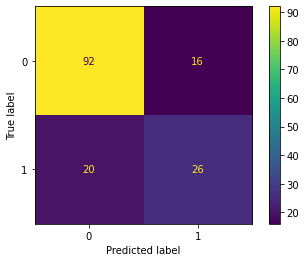

In [301]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

In [302]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.77
Recall: 0.5652173913043478
Precisión: 0.6190476190476191
Puntuación F1: 0.5909090909090909


In [303]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       108
           1       0.62      0.57      0.59        46

    accuracy                           0.77       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.77      0.76       154



In [304]:
importancia= arbol.feature_importances_
importancia

array([0.31593377, 0.10774765, 0.09350816, 0.18778913, 0.17195074,
       0.12307054])

In [305]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Glucose,0.315934
1,BMI,0.187789
2,DiabetesPedigreeFunction,0.171951
3,Age,0.123071
4,BloodPressure,0.107748
5,Insulin,0.093508


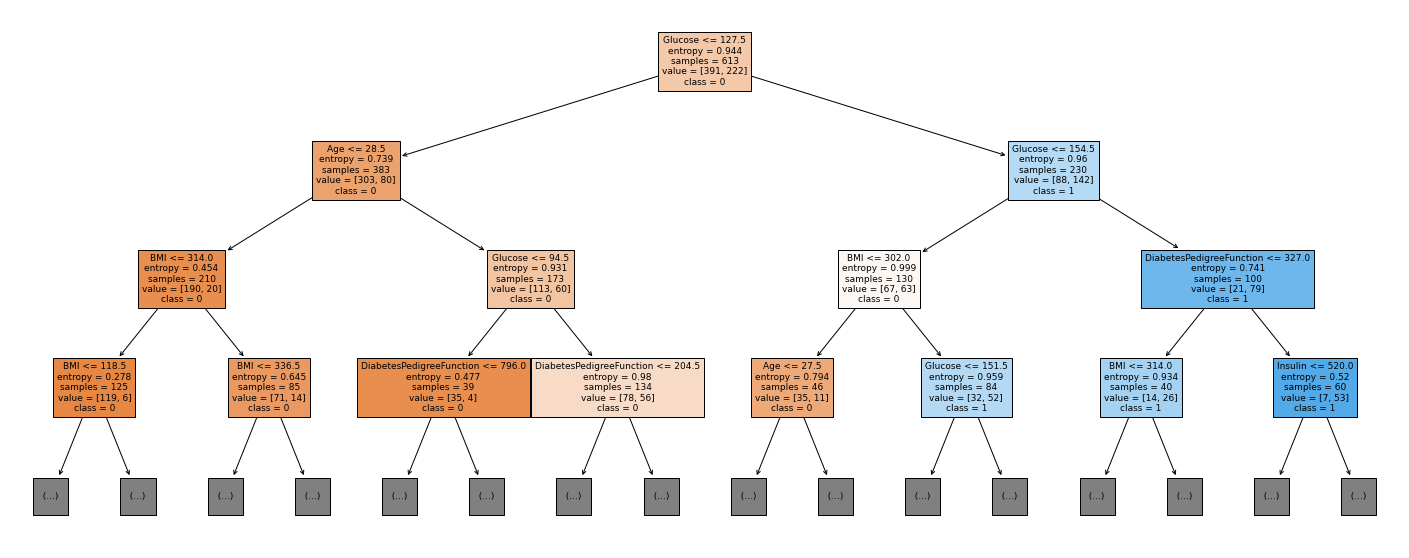

In [306]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [307]:
# También podemos guardar esta figura como una imagen.
fig.savefig("decision_treeBase.png")

Procedemos a generar otro árbol de desición, en este caso en base a los resultados del proceso de crossvalidatión y modificamos los resultados

In [308]:

# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [309]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20,50,100],'min_samples_split':[2, 3, 4, 5,10,20,50,100]}

In [310]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [311]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20, 50, 100],
                         'min_samples_split': [2, 3, 4, 5, 10, 20, 50, 100]})

In [312]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 100}

In [313]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
arbol_final =arbol_final.fit(X_train,Y_train)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print('Recall sobre entrenamiento: %.2f' % recall_score(Y_train, y_pred_train))
print('Recall sobre test: %.2f' % recall_score(Y_test, y_pred_test))
print('Precision sobre entrenamiento: %.2f' % precision_score(Y_train, y_pred_train))
print('Precision sobre test: %.2f' % precision_score(Y_test, y_pred_test))
print('f1 sobre entrenamiento: %.2f' % f1_score(Y_train, y_pred_train))
print('f1 sobre test: %.2f' % f1_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.77
Exactitud sobre test: 0.81
Recall sobre entrenamiento: 0.59
Recall sobre test: 0.59
Precision sobre entrenamiento: 0.73
Precision sobre test: 0.71
f1 sobre entrenamiento: 0.65
f1 sobre test: 0.64


In [314]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       108
           1       0.71      0.59      0.64        46

    accuracy                           0.81       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



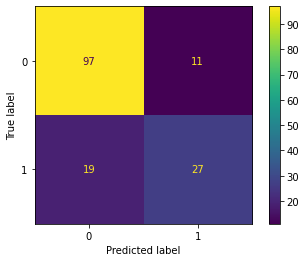

In [315]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol_final, X_test, Y_test)  
plt.show()  

In [242]:
importancia= arbol_final.feature_importances_
importancia

array([0.70317649, 0.        , 0.02981612, 0.06905051, 0.06305366,
       0.13490321])

In [243]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Glucose,0.703176
1,Age,0.134903
2,BMI,0.069051
3,DiabetesPedigreeFunction,0.063054
4,Insulin,0.029816
5,BloodPressure,0.000000


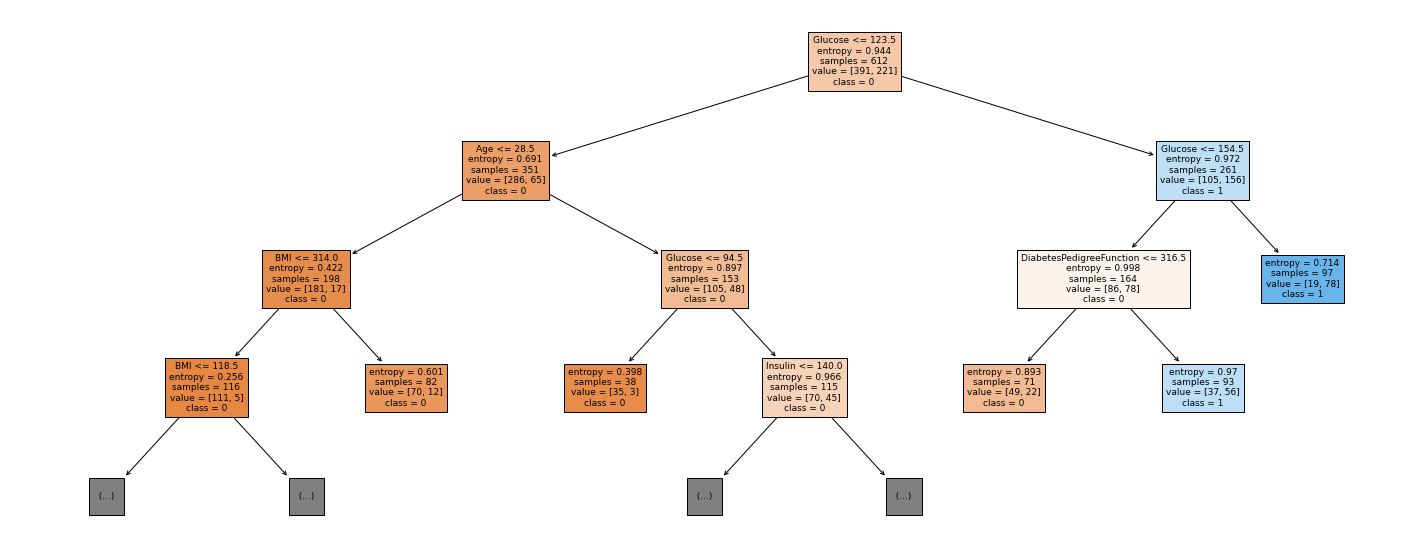

In [244]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol_final, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [245]:
# También podemos guardar esta figura como una imagen.
fig.savefig("decision_treeCross.png")

# Clasificador de libre elección: Regresión Logística. 
### Autor: Juan Diego Trujillo Montoya
Las siguientes lineas presentan el desarrollo del modelo de regresión logística desarrollado por Juan Diego Trujillo. 

In [47]:
Y = df_health_fixed['Outcome']
X = df_health_Modeling 
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Vamos a utilizar los datos por defecto del algoritmo para tener una visión inicial de su rendimiento
linearModel = LogisticRegression()

In [48]:
# Entrenamos el modelo inicial
linearModel.fit(X_train, Y_train)

LogisticRegression()

In [49]:
# Realizamos la predicción sobre los datos de prueba
y_pred = linearModel.predict(X_test)

In [50]:
# Generación de la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[101,   7],
       [ 21,  25]], dtype=int64)

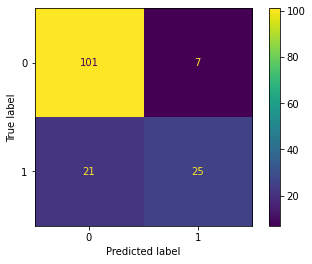

In [51]:
plot_confusion_matrix(linearModel, X_test, Y_test)
plt.show()

In [52]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.82
Recall: 0.5434782608695652
Precisión: 0.78125
Puntuación F1: 0.641025641025641


In [53]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       108
           1       0.78      0.54      0.64        46

    accuracy                           0.82       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.81      0.82      0.81       154



In [55]:
importancia = linearModel.coef_[0]
importancia

array([ 0.03677236, -0.00161842, -0.00126741,  0.00124689,  0.00087683,
        0.02110388])

In [56]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns, "Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by="Importancia", ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Glucose,0.036772
1,Age,0.021104
2,BMI,0.001247
3,DiabetesPedigreeFunction,0.000877
4,Insulin,-0.001267
5,BloodPressure,-0.001618


In [59]:
# Codigo para graficar facilmente un grafico de decision boundaries extraido de: 
# https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\MSI GP63\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

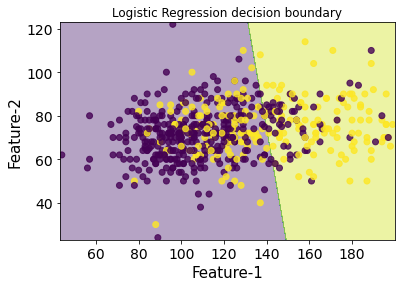

In [60]:
plt.figure
plt.title("Logistic Regression decision boundary")
plot_decision_boundaries(X_train, Y_train, LogisticRegression)

In [61]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Se vuelve a definir el modelo
linearModel = LogisticRegression()

In [87]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(linearModel, param_grid, cv=particiones)

# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

C:\Users\MSI GP63\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MSI GP63\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MSI GP63\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\MSI GP63\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [63]:
mejor_modelo.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [86]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))s

Exactitud: 0.82
Recall: 0.5434782608695652
Precisión: 0.78125
Puntuación F1: 0.641025641025641


In [64]:
# Obtener el mejor modelo.
modelo_lineal_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_lineal_final.predict(X_train)
y_pred_test = modelo_lineal_final.predict(X_test)
modelo_lineal_final =modelo_lineal_final.fit(X_train,Y_train)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print('Recall sobre entrenamiento: %.2f' % recall_score(Y_train, y_pred_train))
print('Recall sobre test: %.2f' % recall_score(Y_test, y_pred_test))
print('Precision sobre entrenamiento: %.2f' % precision_score(Y_train, y_pred_train))
print('Precision sobre test: %.2f' % precision_score(Y_test, y_pred_test))
print('f1 sobre entrenamiento: %.2f' % f1_score(Y_train, y_pred_train))
print('f1 sobre test: %.2f' % f1_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.75
Exactitud sobre test: 0.82
Recall sobre entrenamiento: 0.53
Recall sobre test: 0.54
Precision sobre entrenamiento: 0.72
Precision sobre test: 0.78
f1 sobre entrenamiento: 0.61
f1 sobre test: 0.64


In [67]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       108
           1       0.78      0.54      0.64        46

    accuracy                           0.82       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.81      0.82      0.81       154



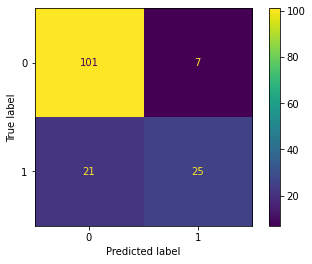

In [69]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(modelo_lineal_final, X_test, Y_test)  
plt.show()  